## Dragon Real Estate Price Predictor

In [ ]:
import pandas as pd

In [ ]:
housing = pd.read_csv("Real_estate_valuation_data_set.csv")

In [ ]:
housing.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
housing.info

<bound method DataFrame.info of       No  X1 transaction date  X2 house age  \
0      1          2012.916667          32.0   
1      2          2012.916667          19.5   
2      3          2013.583333          13.3   
3      4          2013.500000          13.3   
4      5          2012.833333           5.0   
..   ...                  ...           ...   
409  410          2013.000000          13.7   
410  411          2012.666667           5.6   
411  412          2013.250000          18.8   
412  413          2013.000000           8.1   
413  414          2013.500000           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4  

In [ ]:
housing.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt 

array([[<Axes: title={'center': 'No'}>,
        <Axes: title={'center': 'X1 transaction date'}>,
        <Axes: title={'center': 'X2 house age'}>],
       [<Axes: title={'center': 'X3 distance to the nearest MRT station'}>,
        <Axes: title={'center': 'X4 number of convenience stores'}>,
        <Axes: title={'center': 'X5 latitude'}>],
       [<Axes: title={'center': 'X6 longitude'}>,
        <Axes: title={'center': 'Y house price of unit area'}>, <Axes: >]],
      dtype=object)

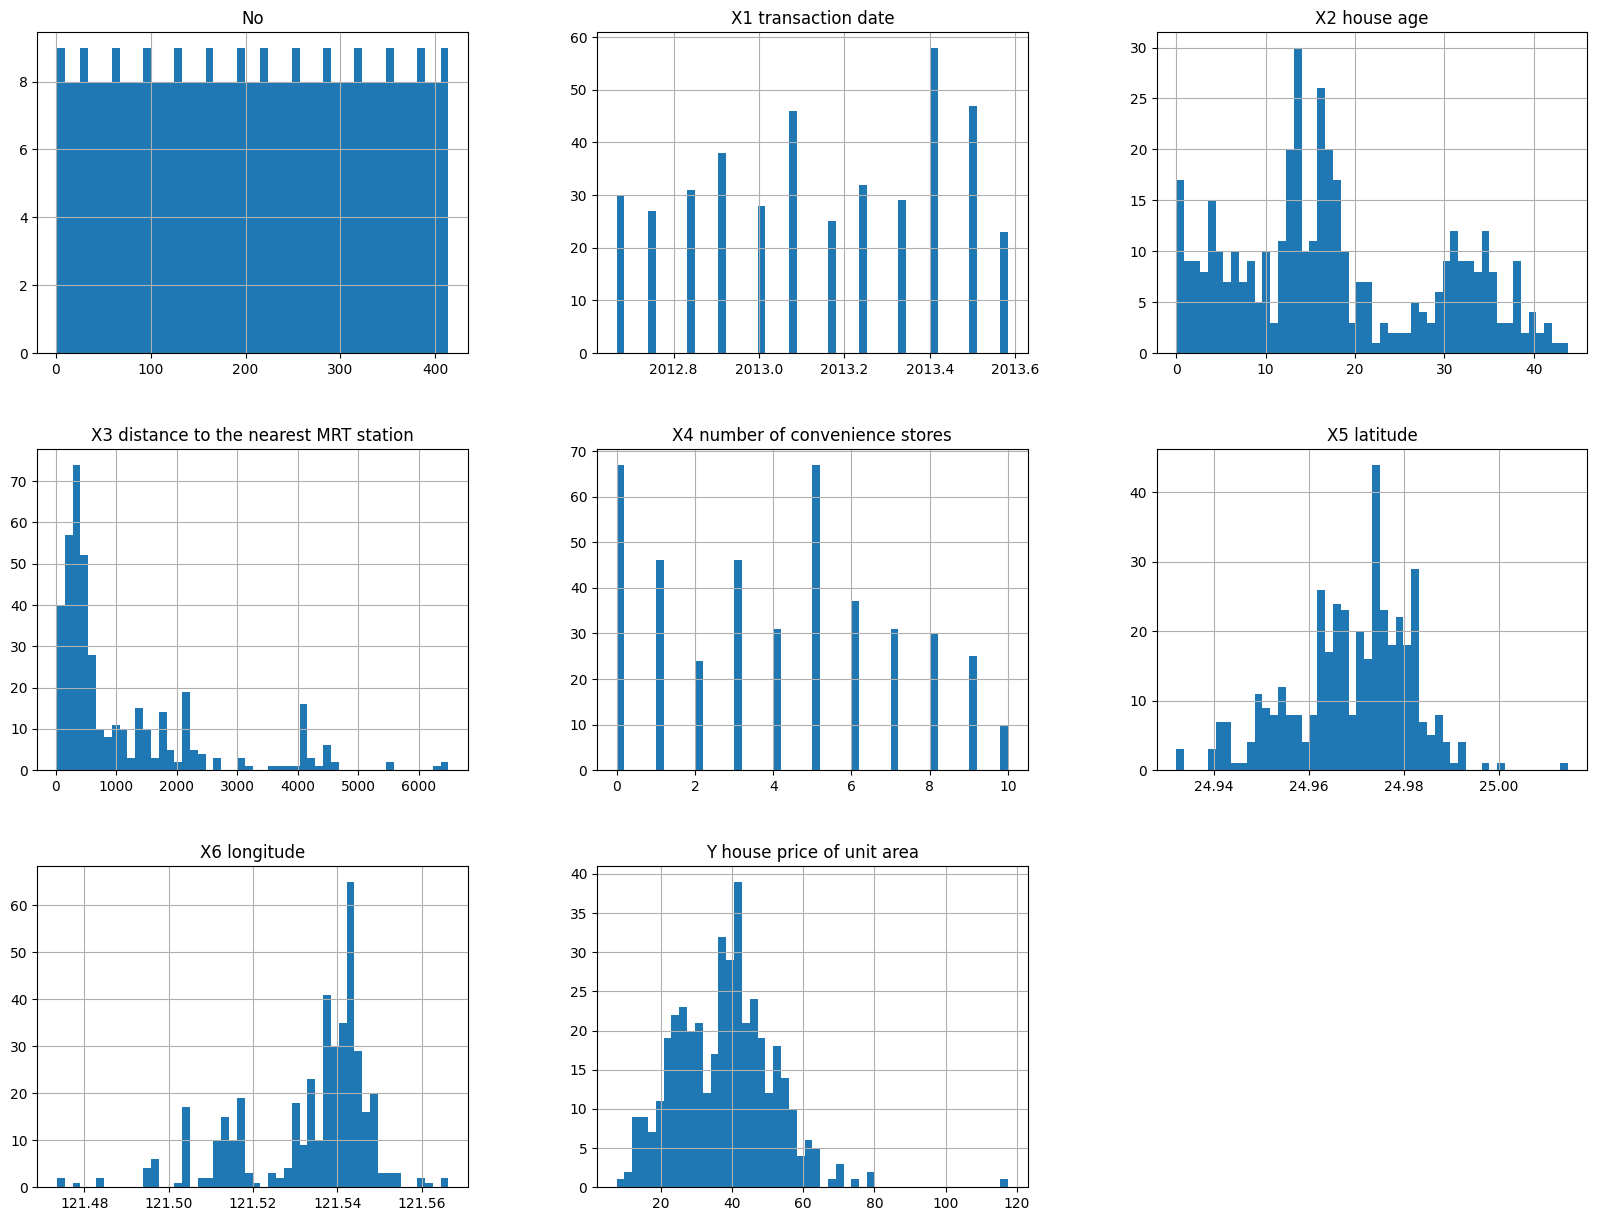

In [ ]:
housing.hist(bins = 50 , figsize = (20 , 15 ))

## train-test spliting

In [ ]:
# for learning purpose
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio) 
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size :]
    return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
#train_set, test_set = split_train_test(housing, 0.2)

In [ ]:
#print(f"Rows in train set: {len(train_set)}\nRows in test set : {len(test_set)}\n")

In [ ]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(housing, test_size=0.2 , random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set : {len(test_set)}\n")

Rows in train set: 331
Rows in test set : 83



In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing['X4 number of convenience stores']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


In [ ]:
strat_test_set['X4 number of convenience stores'].value_counts()

X4 number of convenience stores
5     14
0     14
3      9
1      9
6      7
4      6
7      6
8      6
9      5
2      5
10     2
Name: count, dtype: int64

In [ ]:
strat_train_set['X4 number of convenience stores'].value_counts()

X4 number of convenience stores
0     53
5     53
3     37
1     37
6     30
4     25
7     25
8     24
9     20
2     19
10     8
Name: count, dtype: int64

In [ ]:
strat = strat_train_set.copy()

## looking for correlations

In [ ]:
corr_matrix = housing.corr()
corr_matrix['Y house price of unit area'].sort_values(ascending=False)

Y house price of unit area                1.000000
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
X1 transaction date                       0.087529
No                                       -0.028587
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
Name: Y house price of unit area, dtype: float64

array([[<Axes: xlabel='Y house price of unit area', ylabel='Y house price of unit area'>,
        <Axes: xlabel='X4 number of convenience stores', ylabel='Y house price of unit area'>,
        <Axes: xlabel='X5 latitude', ylabel='Y house price of unit area'>,
        <Axes: xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>],
       [<Axes: xlabel='Y house price of unit area', ylabel='X4 number of convenience stores'>,
        <Axes: xlabel='X4 number of convenience stores', ylabel='X4 number of convenience stores'>,
        <Axes: xlabel='X5 latitude', ylabel='X4 number of convenience stores'>,
        <Axes: xlabel='X3 distance to the nearest MRT station', ylabel='X4 number of convenience stores'>],
       [<Axes: xlabel='Y house price of unit area', ylabel='X5 latitude'>,
        <Axes: xlabel='X4 number of convenience stores', ylabel='X5 latitude'>,
        <Axes: xlabel='X5 latitude', ylabel='X5 latitude'>,
        <Axes: xlabel='X3 distance to t

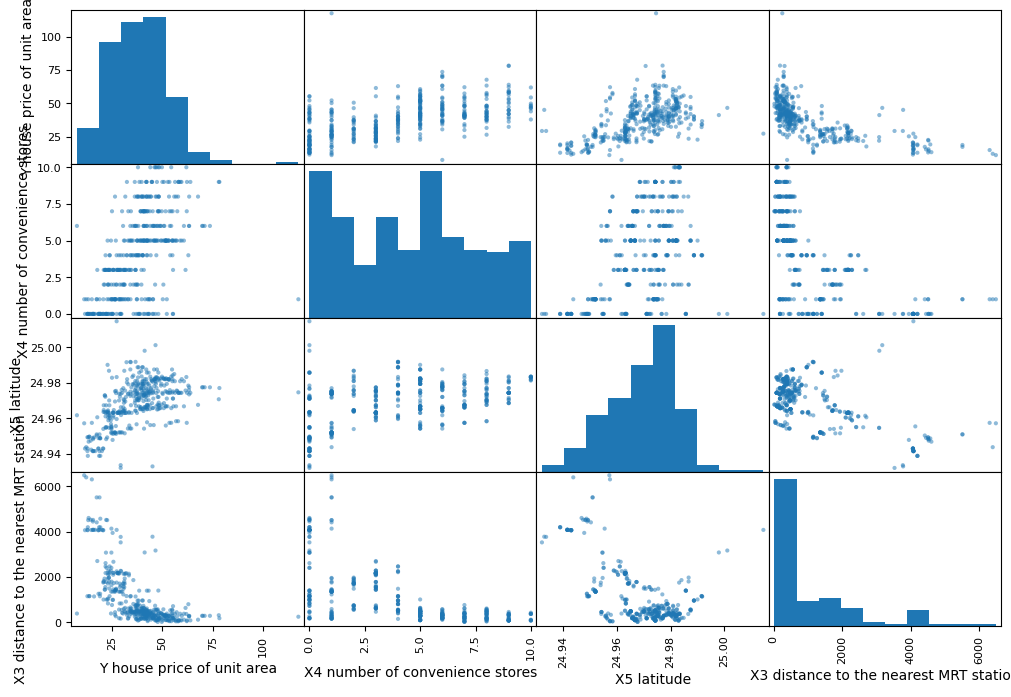

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["Y house price of unit area", "X4 number of convenience stores", 
              "X5 latitude", "X3 distance to the nearest MRT station"]
scatter_matrix(housing[attributes], figsize=(12, 8))


<Axes: xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>

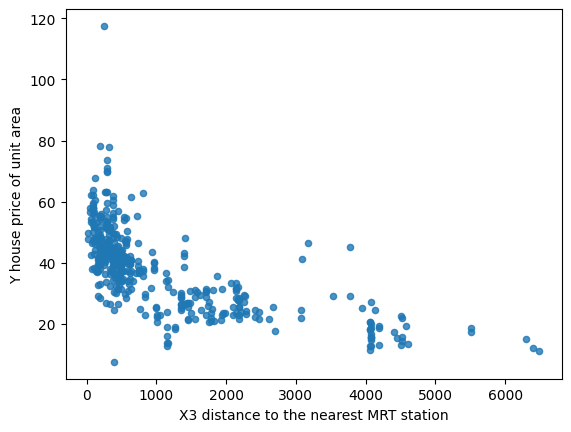

In [ ]:
housing.plot(kind="scatter" , x="X3 distance to the nearest MRT station" , y="Y house price of unit area" , alpha = 0.8)

## attribute combinations 

In [ ]:
housing["HOUSEPRICELATITUDE"] = housing["Y house price of unit area"] / housing["X5 latitude"]


In [ ]:
housing["HOUSEPRICELATITUDE"]

0      1.517033
1      1.689328
2      1.892950
3      2.193100
4      1.725424
         ...   
409    0.617444
410    2.002056
411    1.625350
412    2.102798
413    2.558627
Name: HOUSEPRICELATITUDE, Length: 414, dtype: float64

In [ ]:
housing.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,HOUSEPRICELATITUDE
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9,1.517033
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2,1.689328
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3,1.892950
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8,2.193100
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1,1.725424


In [ ]:
corr_matrix = housing.corr()
corr_matrix['Y house price of unit area'].sort_values(ascending=False)

Y house price of unit area                1.000000
HOUSEPRICELATITUDE                        0.999999
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
X1 transaction date                       0.087529
No                                       -0.028587
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
Name: Y house price of unit area, dtype: float64

<Axes: xlabel='HOUSEPRICELATITUDE', ylabel='Y house price of unit area'>

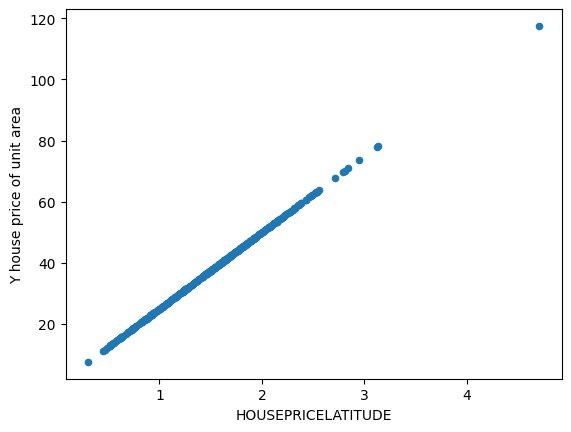

In [ ]:
housing.plot(kind="scatter", x="HOUSEPRICELATITUDE" , y="Y house price of unit area")

In [ ]:
housing["LATITUDELONGITUDE"] = housing["X5 latitude"] / housing["X6 longitude"]

In [ ]:
housing["LATITUDELONGITUDE"]

0      0.205553
1      0.205533
2      0.205584
3      0.205584
4      0.205520
         ...   
409    0.205274
410    0.205477
411    0.205523
412    0.205419
413    0.205477
Name: LATITUDELONGITUDE, Length: 414, dtype: float64

<Axes: xlabel='LATITUDELONGITUDE', ylabel='Y house price of unit area'>

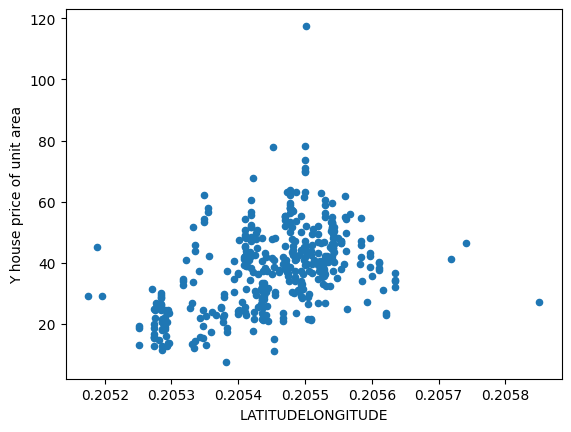

In [ ]:
housing.plot(kind="scatter", x="LATITUDELONGITUDE" , y="Y house price of unit area")

In [ ]:
housing = strat_train_set.drop("Y house price of unit area", axis=1)
housing_lables = strat_train_set["Y house price of unit area"].copy()

## missing attributs
three ways to solve 

In [ ]:
a = housing.dropna(subset = ["X3 distance to the nearest MRT station"])
a.shape


(331, 7)

In [ ]:
housing.drop("X3 distance to the nearest MRT station",axis=1)

,No,X1 transaction date,X2 house age,X4 number of convenience stores,X5 latitude,X6 longitude
369,370,2012.666667,20.2,3,24.96322,121.51237
360,361,2012.666667,32.9,10,24.98300,121.54022
180,181,2012.666667,26.9,0,24.94898,121.49621
188,189,2012.916667,34.8,8,24.97707,121.54312
404,405,2013.333333,16.4,5,24.98203,121.54348
...,...,...,...,...,...,...
10,11,2013.083333,34.8,1,24.97349,121.53372
381,382,2013.416667,8.0,9,24.98298,121.53981
159,160,2012.666667,15.5,4,24.97886,121.53464
141,142,2013.333333,5.1,3,24.97213,121.51627


In [ ]:
median = housing["X3 distance to the nearest MRT station"].median()

In [ ]:
housing = housing.fillna(housing.median())


In [ ]:
median

np.float64(492.2313)

In [ ]:
housing.shape

(331, 7)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(housing)


SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_

array([ 209.       , 2013.1666667,   16.1      ,  492.2313   ,
          4.       ,   24.9711   ,  121.53844  ])

In [ ]:
X = imputer.transform(housing)

In [ ]:
X = imputer.transform(housing)
housing_tr = pd.DataFrame(X, columns=housing.columns)


In [ ]:
housing_tr.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,209.368580,2013.142749,18.019033,1080.612966,4.102719,24.969250,121.533541
std,120.383667,0.280757,11.497031,1250.250085,2.944182,0.012326,0.015267
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.933630,121.475160
25%,103.500000,2012.916667,9.100000,289.324800,1.000000,24.963050,121.529675
50%,209.000000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538440
75%,311.500000,2013.416667,29.600000,1448.504000,6.000000,24.978045,121.543395
max,414.000000,2013.583333,43.800000,6396.283000,10.000000,25.014590,121.566270


## scikit learn
3 types of object

## creating pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])


In [ ]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [ ]:
housing_num_tr

array([[ 1.33634919, -1.69827898,  0.18998546, ..., -0.37510886,
        -0.48993566, -1.38876478],
       [ 1.26147503, -1.69827898,  1.29629087, ...,  2.00606161,
         1.11723968,  0.43815207],
       [-0.23600818, -1.69827898,  0.7736269 , ..., -1.39561049,
        -1.64697191, -2.44883575],
       ...,
       [-0.41071455, -1.69827898, -0.21943465, ..., -0.03494165,
         0.78085414,  0.07211271],
       [-0.56046288,  0.67985036, -1.12538554, ..., -0.37510886,
         0.23402451, -1.13293083],
       [ 0.69575915, -0.21194823, -0.04521333, ...,  0.30522556,
        -1.01645216,  0.03012971]], shape=(331, 7))

## selecting a model for real estates


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor  # Fixed the missing 'import'

# model = LinearRegression()
# model = DecisionTreeRegressor()  # ← parentheses are important!
model = RandomForestRegressor()  # Added parentheses to instantiate the model
model.fit(housing_num_tr, housing_lables)  # Fixed the typo: 'lables' → 'labels'


RandomForestRegressor()

In [ ]:
some_data = housing.iloc[:5]

In [ ]:
some_lables = housing_lables.iloc[:5]

In [ ]:
prepared_data = my_pipeline.transform(some_data)

In [ ]:
model.predict(prepared_data)

array([23.944, 45.119, 15.526, 44.913, 44.416])

In [ ]:
list(some_lables)

[22.8, 47.1, 15.5, 44.3, 41.2]

## evaluating the model

In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_lables, housing_predictions)
rmse = np.sqrt(mse)




In [ ]:
mse

6.492191078549843

## using better evaluation technique = cross validation


In [ ]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, housing_num_tr, housing_lables, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)  # Negate since scores are negative MSE

In [ ]:
rmse_scores

array([5.02510509, 7.99322905, 4.8696921 , 7.85967343, 9.11798281,
       5.27839988, 6.63748313, 5.95277489, 5.22567528, 9.1279069 ])

In [ ]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())  # Corrected the typo here
    print("Standard deviation: ", scores.std())


In [ ]:
print_scores(rmse_scores)

Scores: [5.02510509 7.99322905 4.8696921  7.85967343 9.11798281 5.27839988
 6.63748313 5.95277489 5.22567528 9.1279069 ]
Mean:  6.708792257633505
Standard deviation:  1.6021865545257885


## Quiz: Convert this notebook onto a python file and the pipeline using Visual Studio Code

## saving the model


In [ ]:
from joblib import dump, load
dump(model, 'Real_Estates.joblib')  # Corrected 'dumb' → 'dump'


['Real_Estates.joblib']

## testing the model

In [ ]:
X_test = strat_test_set.drop("Y house price of unit area", axis=1)
Y_test = strat_test_set["Y house price of unit area"].copy()

X_test_prepared = my_pipeline.transform(X_test)

final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
# print(final_predictions, list(Y_test))


In [ ]:
final_rmse

np.float64(10.15109724676367)

In [ ]:
prepared_data[0]

array([ 1.33634919, -1.69827898,  0.18998546,  0.88477281, -0.37510886,
       -0.48993566, -1.38876478])

## using the model

In [ ]:
from joblib import dump, load
import numpy as np 
model = load('Real_Estates.joblib')
features = np.array([ [1.33634919, -2.69827898,  10.18998546,  2.88477281, -0.37510886,
       -0.48993566, -1.38876478]])
model.predict(features)

array([22.51])